1. Del artículo:
https://www.nature.com/articles/s41598-020-59821-7

Consultar y explicar los dos métodos de reducción de ruido usados en el artículo: Robust LOESS y Non Local Means (10%), mostrar cómo se podrían implementar en Python (5%)

### LOESS

LOESS o ajuste de regresión polinómica local, es un método que ajusta un polinomio a puntos de datos cercanos a cada punto en una señal. En vez de crear una única línea de ajuste para toda la serie de datos, LOESS usa múltiples ajustes locales, que se calculan para cada punto de la señal en función de sus vecinos dentro de una ventana de tamaño específico y se puede usar tanto para polinomios de bajo grado o de alto grado, como una línea o una parábola.
Para aplicarlo primero se define una ventana que incluye puntos cercanos a cada punto objetivo en la señal. Para cada punto dentro de esta ventana, se ajusta un polinomio de bajo orden, generalmente de primer o segundo grado, a los datos en esa vecindad y a los puntos más cercanos al objetivo se les asignan pesos mayores que a los más lejanos, usando una función de ponderación, esto da más relevancia a los puntos cercanos, lo cual es útil para capturar tendencias locales sin exagerar los puntos extremos o las irregularidades, finalmente para evitar que valores atípicos o ruido de alta frecuencia influyan en el ajuste, LOESS robusto usa una iteración adicional en la que se ajusta de nuevo la curva, pero otorgando menos peso a los puntos que se desviaron mucho en la iteración anterior [1], [2].

Para aplicarlo en Python se puede hacer uso de la librería statsmodels que tiene una función denominada lowess, esta función tiene diferentes argumentos:
1.	endog: Los valores dependientes (eje y).
2.	exog: Los valores independientes (eje x).
3.	frac: Tamaño de la ventana de suavizado. Es un valor entre 0 y 1 a valores más pequeños suavizan más.
4.	it: Número de iteraciones robustas, ayuda a ajustar el suavizado para minimizar la influencia de valores atípicos.
5.	robust: Si es True, se aplica un ajuste robusto en cada iteración.[3]


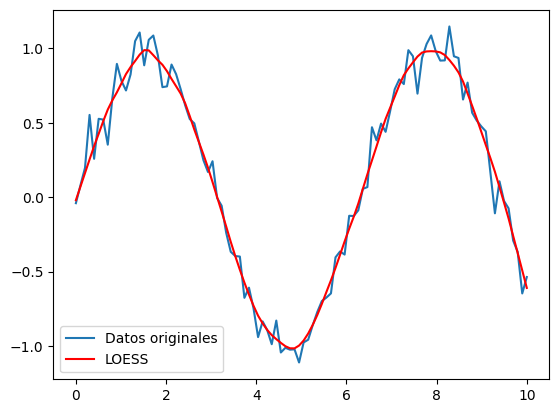

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Datos de ejemplo
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(0, 0.1, size=len(x))

s= lowess(y, x, frac=0.1)

# Graficar resultados
plt.plot(x, y, label='Datos originales')
plt.plot(s[:, 0], s[:, 1], label='LOESS', color='red')
plt.legend()
plt.show()


###Non Local Means

El filtrado no local (NLM) es una técnica de reducción de ruido que aprovecha similitudes entre segmentos de una señal en un espacio de alta dimensión. A diferencia de los métodos locales, NLM considera vecindarios más amplios para calcular promedios ponderados, obteniendo así mejores resultados en la preservación de detalles, esta técnica es ampliamente utilizada en el procesamiento de imagenes. Para aplicar el NLM se siguen los siguientes pasos:
1.	Definición de Ventanas: Se divide la señal en segmentos de igual longitud, denominados ventanas. El tamaño de estas ventanas es un parámetro que influye en la capacidad del algoritmo para capturar características locales.
2.	Cálculo de Similitud: Para cada posición de la ventana, se calcula una medida de similitud con todas las demás ventanas dentro de un rango predefinido. Esta similitud se evalúa típicamente mediante la comparación de los valores de los puntos dentro de cada ventana, utilizando métricas como la distancia euclidiana o la correlación.
3.	Asignación de Pesos: A cada ventana se le asigna un peso que refleja su similitud con la ventana central. Las ventanas más similares reciben pesos mayores.
4.	Promedio Ponderado: El valor estimado en el centro de la ventana actual se calcula como una combinación lineal de los valores correspondientes en todas las ventanas. Esta combinación lineal, también conocida como promedio ponderado, permite reconstruir la señal en el punto central de la ventana, reduciendo el efecto del ruido.
5.	Reconstrucción de la Señal: El proceso se repite para todas las posiciones de la ventana, generando una nueva señal filtrada donde el ruido ha sido atenuado.[4],[2]


Para realizar el NLM en python se debe usar una librería llamada skimage.restoration y llamar una función denominada denoise_nl_means, esta función recibe 4 argumentos que son:
1.	image: La señal a procesar.
2.	patch_size: Tamaño del parche usado para comparar la similitud entre los puntos.
3.	patch_distance: Rango de búsqueda en el cual se comparan los parches.
4.	h: Parámetro de suavidad. Controla la cantidad de suavizado. Un valor mayor elimina más ruido pero puede borrar detalles.
5.	fast_mode: Si es True, el filtro se aplica más rápido pero con menos precisión.[5]



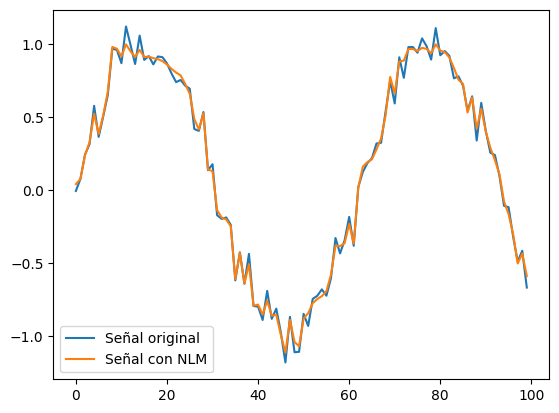

In [5]:
from skimage.restoration import denoise_nl_means

# Datos de ejemplo
x = np.linspace(0, 10, 100)
signal = np.sin(x) + np.random.normal(0, 0.1, size=len(x))
signal_2 = signal.reshape(1, -1)

# Aplicar NLM
F_signal = denoise_nl_means(signal_2, patch_size=5, patch_distance=6)



plt.plot(signal, label='Señal original')
plt.plot(F_signal, label='Señal con NLM')
plt.legend()
plt.show()


[1]	«4.1.4.4. LOESS (también conocido como LOWESS)». Accedido: 7 de noviembre de 2024. [En línea]. Disponible en: https://www.itl.nist.gov/div898/handbook/pmd/section1/pmd144.htm

[2]	«Prediction of atrial fibrillation from at-home single-lead ECG signals without arrhythmias | npj Digital Medicine». Accedido: 24 de octubre de 2024. [En línea]. Disponible en: https://www.nature.com/articles/s41746-023-00966-w

[3]	lowess: Lowess smoothed as defined for STATA 13. Python. Accedido: 7 de noviembre de 2024. [OS Independent]. Disponible en: http://github.com/CCGE-Cambridge/lowess

[4]	A. Buades, B. Coll, y J.-M. Morel, «Non-Local Means Denoising», Image Process. Line, vol. 1, pp. 208-212, sep. 2011, doi: 10.5201/ipol.2011.bcm_nlm.

[5]	A. Buades, B. Coll, y J.-M. Morel, «Non-Local Means Denoising», Image Process. Line, vol. 1, pp. 208-212, sep. 2011, doi: 10.5201/ipol.2011.bcm_nlm.



2. De la base de datos extraer los registros que correspondan a bradicardia sinusal (SB Sinus Bradycardia) y fibrilación auricular (AFIB Atrial Fibrillation). De estos registros los análisis para el presente proyecto deben hacerse en la derivación II.

In [ ]:
from google.colab import drive
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install PyWavelets
import pywt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 26.5 MB/s eta 0:00:00


In [ ]:
!cp /content/drive/MyDrive/Biosenales/ECGData.zip .
!unzip ECGData.zip

## **Funciones**

In [ ]:
import numpy as np ; import matplotlib.pyplot as plt ; from scipy import signal
from random import randint ; import pandas as pd ; from scipy import signal,stats

def Str2Num_Vector(vector):
    vector_numeros = []
    for elemento in vector:
        vector_numeros.append(float(elemento))
    return vector_numeros

def Plot_Detalles(wavelet,name):
    fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(22, 4))
    plt.suptitle("Detalles obtenidos por la wavelet "+name)
    axes[0].plot(wavelet[1])    ; axes[0].set_title('Detalle 1')
    axes[1].plot(wavelet[2])    ; axes[1].set_title('Detalle 2')
    axes[2].plot(wavelet[3])    ; axes[2].set_title('Detalle 3')
    axes[3].plot(wavelet[4])    ; axes[3].set_title('Detalle 4')
    axes[4].plot(wavelet[5])    ; axes[4].set_title('Detalle 5')
    axes[5].plot(wavelet[6])    ; axes[5].set_title('Detalle 6')
    axes[6].plot(wavelet[7])    ; axes[6].set_title('Detalle 7')
    plt.plot()


def diez_senales_aleatorias(signal):
    senal_aleatoria = []
    for i in range(10):
        senal_aleatoria.append(signal[randint(0,len(signal))])
    return np.array(senal_aleatoria)

def Guardar_Senales_aleatorias( senales_afib,senales_sb):
    todas_senales = np.hstack((senales_afib.T, senales_sb.T))
    # Crear un DataFrame
    df = pd.DataFrame(todas_senales)
    # Agregar nombres de columnas
    columnas = [f"AFIB_{i+1}" for i in range(10)] + [f"SB_{i+1}" for i in range(10)]
    df.columns = columnas
    # Guardar en Excel
    df.to_excel('senales_aleatorias.xlsx', index=False)


def comprimir(senal):
    x_min = np.amin(senal)
    x_max = np.amax(senal)
    Datos_comprimir = (senal - x_min) / (x_max - x_min)
    return Datos_comprimir

def Detrend(senal):
  senal_detrend=signal.detrend(senal)
  return senal_detrend

def Frec_MaxPot(senal):
  Fs=500
  nperseg=1000
  noverlap = int(nperseg/2)
  f, Pxx_den = signal.welch(np.array(senal), Fs,'hann' ,nperseg, noverlap)
  indice_max = np.argmax(Pxx_den) # nos da el indice, Encontrar la frecuencia con la máxima potencia
  frecuencia_maxima = f[indice_max]
  return frecuencia_maxima

def Plot_Frec_MaxPot(senal,str):
  Fs=500
  nperseg=1000
  noverlap = int(nperseg/2)
  f, Pxx_den = signal.welch(np.array(senal), Fs,'hann' ,nperseg, noverlap)
  indice_max = np.argmax(Pxx_den) # nos da el indice, Encontrar la frecuencia con la máxima potencia
  frecuencia_maxima = f[indice_max]
  max_value = Pxx_den[indice_max]

  plt.scatter(frecuencia_maxima, max_value, color='red', marker='o', s=100)
  plt.text(frecuencia_maxima, max_value, f'Frec máxima potencia: {frecuencia_maxima:.2f}')
  plt.plot(f, Pxx_den)
  plt.title(str)

def plot_sencillo(senal,name):
    plt.figure(figsize=(13, 5))
    plt.plot(senal,label="Señal "+name)
    plt.title("Señal "+name)
    plt.legend()
    plt.show()

def evaluar_normalidad(vector,text):
  stat, p = stats.shapiro(vector)
  if p > 0.05:
    return f" No se rechaza H0. Los datos {text} siguen  una distribución normal."
  else:
    return f"Se rechaza H0. Los datos {text} NO siguen una distribución normal."

def graficas_normalidad(vector,name):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3.8))
    plt.suptitle("Comprobación normalidad " + name)
    axes[0].hist(vector, bins=20)           ;   axes[0].set_title('Histograma')
    stats.probplot(vector, plot=axes[1])    ;   axes[1].set_title('Q-Q plot de fMP')
    plt.show()

def evaluar_homocedasticidad(vector1, vector2, text1, text2):
  stat, p = stats.levene(vector1, vector2)
  if p > 0.05:
    return f"No se rechaza H0. Los datos {text1} y {text2} son homocedasticos, es decir, tienen varianzas iguales."
  else:
    return f"Se rechaza H0. Los datos {text1} y {text2} NO son homocedasticos, tienen varianzas distintas."

def graficas_homocedasticidad(vector1, vector2, name1, name2):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3.8))
    plt.suptitle("Comprobación homocedasticidad " + name1 + " y " + name2)
    axes[0].scatter(vector1, vector2)                            ;   axes[0].set_title('Scatter')
    axes[1].boxplot([vector1, vector2], labels=[name1, name2])  ;    axes[1].set_title('Bloxplot')
    plt.show()

def Rango_Intercuartil(senal):
  senal = np.sort(senal)
  Q1 = np.percentile(senal, 25)
  Q3 = np.percentile(senal, 75)
  IQR = Q3 - Q1
  return IQR

def Mann_Whitney_U(senal1, senal2,name1, name2):
  stat, p = stats.mannwhitneyu(senal1, senal2)
  if p > 0.05:
    return f"No se rechaza la hipótesis nula H0, las diferencias entre las muestras {name1} y {name2} \n no son estadísticamente significativas en términos de medianas."
  else:
    return f"Se rechaza H0. Hay una diferencia significativa entre las muestras {name1} y {name2} en términos de medianas."


def Prueba_KS(senal1, senal2,name1, name2):
  stat, p = stats.ks_2samp(senal1, senal2)
  if p< 0.05:
    return f"No se rechaza la hipótesis nula H0, las muestras {name1} y {name2} provienen de distribuciones diferentes."
  else:
    return f"Se rechaza H0. No se puede rechazar la hipótesis de que las muestras {name1} y {name2} provienen de la misma distribución."



In [ ]:
directorio_actual=os.getcwd()
archivos=os.listdir(directorio_actual + "/ECGData")
file_path = '/content/drive/MyDrive/Biosenales/Diagnostics.xlsx'
Diagnostics = pd.read_excel(file_path, sheet_name='Sheet1')    # Extraer clasificaciones sujetos
Col_Nombres = pd.DataFrame(Diagnostics.iloc[:,0:2])

Nombres_SB = Col_Nombres[Col_Nombres['Rhythm']=='SB']
Nombres_AFIB = Col_Nombres[Col_Nombres['Rhythm']=='AFIB']

lista_filtrada_SB=[] #Lista con los datos de SB y AFIB
lista_filtrada_AFIB=[]#Lista con los datos de AFIB

for i in range(len(archivos)):
    if archivos[i] in Nombres_SB['FileName'].values+'.csv':
      lista_filtrada_SB.append(archivos[i])

    if archivos[i] in Nombres_AFIB['FileName'].values+'.csv':
        lista_filtrada_AFIB.append(archivos[i])

In [ ]:
Derivacion2_AFIB=[]
Derivacion2_SB=[]

for i in lista_filtrada_AFIB:
    datos = pd.read_csv(directorio_actual+"/ECGData/"+i,delimiter=',',names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4','V5','V6'])
    Derivacion2_AFIB.append(datos['II'])

for i in lista_filtrada_SB:
    datos = pd.read_csv(directorio_actual+"/ECGData/"+i,delimiter=',',names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4','V5','V6'])
    Derivacion2_SB.append(datos['II'])

Derivacion2_AFIB=np.array(Derivacion2_AFIB)
Derivacion2_SB=np.array(pd.DataFrame(Derivacion2_SB))

In [ ]:
#Se quita el primer valor de los arreglos que es un 'II'
Der2_AFIB=np.delete(Derivacion2_AFIB,0,axis=1)
Der2_SB=np.delete(Derivacion2_SB,0,axis=1)

#Se pasan todos los datos de string a float
for i in range(len(Der2_AFIB)):
  Der2_AFIB[i]=Str2Num_Vector(Der2_AFIB[i])
for i in range(len(Der2_SB)):
  Der2_SB[i]=Str2Num_Vector(Der2_SB[i])
print("DATOS AFIB: ",Der2_AFIB.shape)
print("DATOS SB: "  ,Der2_SB.shape)

DATOS AFIB:  (1780, 5000)
DATOS SB:  (3889, 5000)


De acuerdo con la teoría, entre más similar sea la forma de onda de la señal wavelet, mejor será la eliminación del ruido de la señal [6]. Algunos tipos de wavelet que son implementados para analizar señales de ECG son el wavelet Daubechies [7] y el Wavelet Symlet [8] y ambos presentan una simetría similar a la onda del complejo QRS. Múltiples estudios han analizado las estructuras y familias de transformadas wavelets con el objetivo de eliminar las desviaciones de línea base de señales ECG, siendo las familias de wavelets Daubechies-3 y Symlets-3 transformadas con un desempeño destacable [9], siendo la métrica de evaluación el error cuadrático medio (MSE). Para construir estos tipos de wavelets fue necesario emplear 7 niveles de transformada.

[1] “Transformada Wavelet – acervo para el mejoramiento del aprendizaje de alumnos de ingeniería, en Inteligencia Artificial”. Accedido el 1 de noviembre de 2024. [En línea]. Disponible: https://virtual.cuautitlan.unam.mx/intar/?page_id=1108#:~:text=Las%20wavelets%20pueden%20ser%20irregulares,,%20la%20wavelet%20Symlet,%20etc.

[2] “Vista de Las wavelets en el análisis de ECG”. Revistas UTP. Accedido el 1 de noviembre de 2024. [En línea]. Disponible: https://revistas.utp.edu.co/index.php/revistaciencia/article/view/13781/9361

[3] “Caracterización con wavelets de alteraciones electrocardiográficas en pacientes con enfermedad de Chagas”. SciELO Colombia- Scientific Electronic Library Online. Accedido el 1 de noviembre de 2024. [En línea]. Disponible: http://www.scielo.org.co/scielo.php?script=sci_arttext&pid=S0121-37092015000200009

[4] “Comparing different wavelet transforms on removing electrocardiogram baseline wanders and special trends - BMC Medical Informatics and Decision Making”. BioMed Central. Accedido el 1 de noviembre de 2024. [En línea]. Disponible: https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-01349-x

In [ ]:
t=len(Der2_SB[0])/500
tiempo = np.linspace(0, t, len(Der2_SB[0]))

**Según lo anterior, se compararon las wavelet Daubechies (db3) y Symlet (sym3) para determinar cuál de estos utilizar en el flujo posterior de trabajo.**

In [ ]:
print(pywt.Wavelet('db3'))
print(pywt.Wavelet('sym3'))

Wavelet db3
  Family name:    Daubechies
  Short name:     db
  Filters length: 6
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False
Wavelet sym3
  Family name:    Symlets
  Short name:     sym
  Filters length: 6
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       near symmetric
  DWT:            True
  CWT:            False


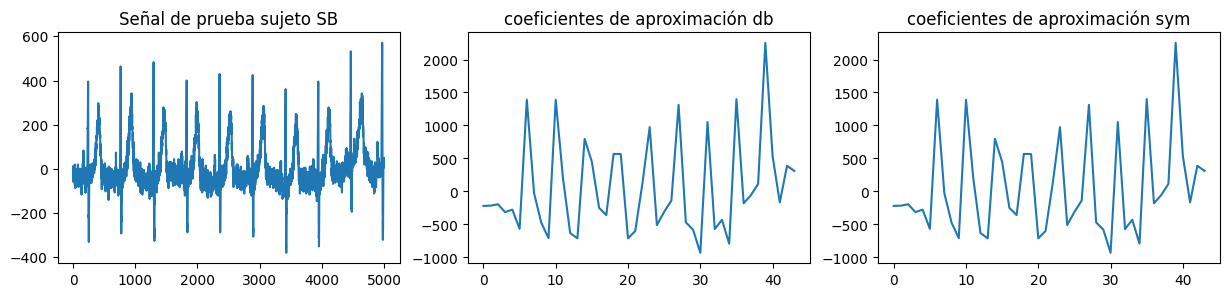

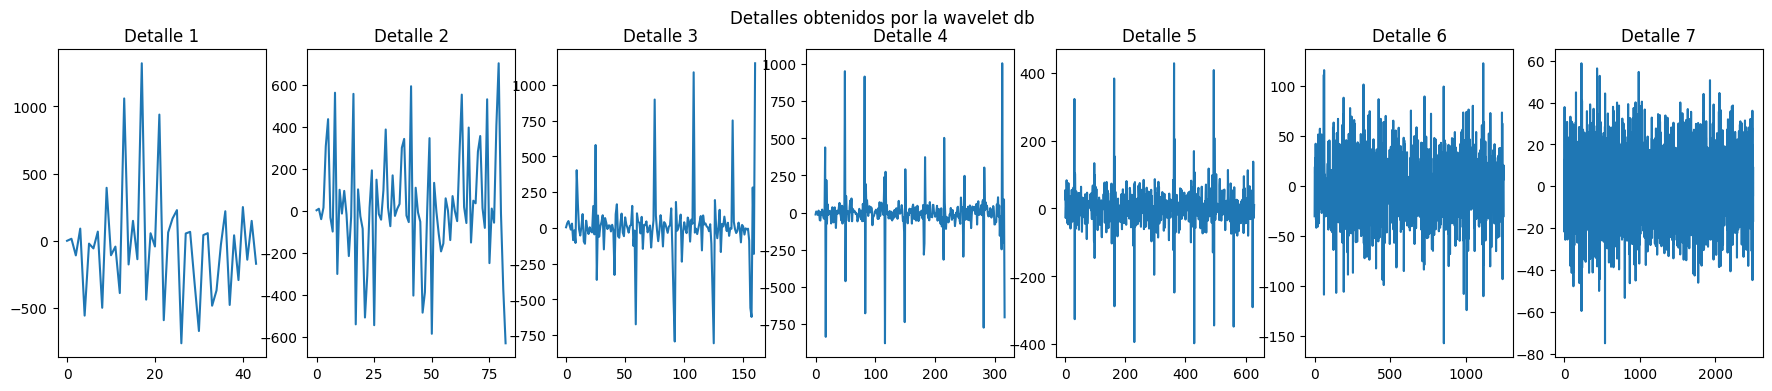

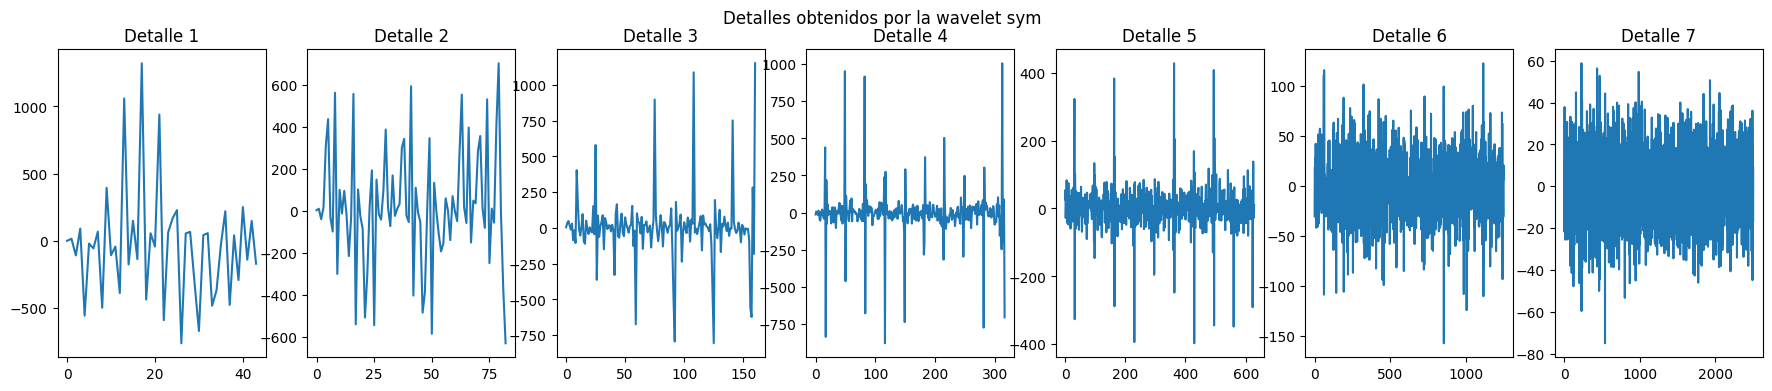

In [ ]:
#Wavelet Daubechies 3
data_wavelet_db = pywt.wavedec( Der2_SB[0], 'db3', level=7 )
details_db = data_wavelet_db[1:]
#Wavelet Symlets 3
data_wavelet_sym = pywt.wavedec( Der2_SB[0], 'sym3', level=7 )
details_sym = data_wavelet_sym[1:]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 3))
axes[0].plot(tiempo,Der2_SB[0])            ; axes[0].set_title('Señal de prueba sujeto SB') ; axes[0].set_xlabel('Tiempo (s)');axes[0].set_ylabel('Amplitud')
axes[1].plot(data_wavelet_db[0])    ; axes[1].set_title('coeficientes de aproximación db')
axes[2].plot(data_wavelet_sym[0])    ; axes[2].set_title('coeficientes de aproximación sym')

Plot_Detalles(data_wavelet_db,"db")
Plot_Detalles(data_wavelet_sym,"sym")

**Con lo cual, dado que ambas wavelet consultadas muestran resultados equivalentes en su descomposición por niveles, se aplicó a continuación el flujo de trabajo utilizando el Wavelet Daubechies (db3)**

4. Escoger 10 señales al azar y aplicar un flujo de procesamiento que conste de:

In [ ]:
senal_aleatoria_AFIB = diez_senales_aleatorias(Der2_AFIB)
senal_aleatoria_SB = diez_senales_aleatorias(Der2_SB)
print("SEÑALES ALEATORIAS SB: ",    senal_aleatoria_SB.shape)
print("SEÑALES ALEATORIAS AFIB: ",  senal_aleatoria_AFIB.shape)

SEÑALES ALEATORIAS SB:  (10, 5000)
SEÑALES ALEATORIAS AFIB:  (10, 5000)


Se guardaron 10 señales aleatorias fijas para el análisis :

In [ ]:
#Guardar_Senales_aleatorias(senal_aleatoria_AFIB,senal_aleatoria_SB)
#file_path = '/content/drive/MyDrive/Biosenales/senales_aleatorias.xlsx'
#aleatorias = pd.read_excel(file_path, sheet_name='Sheet1')
#senal_aleatoria_AFIB=aleatorias.iloc[:,0:10]
#senal_aleatoria_SB=aleatorias.iloc[:,10:20]

In [ ]:
#senal_aleatoria_SB = np.array(senal_aleatoria_SB)
#senal_aleatoria_AFIB = np.array(senal_aleatoria_AFIB)

Basados en varios estudios [5][6], se usará un filtro FIR pasa bajas con una ventana tipo Kaiser pues ha demostrado una mejor efectividad a la hora de eliminar ruido de las señales ECG en comparación a otras ventanas.

En el caso del filtro pasa altas, en la literatura [7] también se encontró que una ventana tipo Kaiser se pueden eliminar los ruidos de la señal sin generar grandes distorsiones en su forma de onda.

El orden será calculado empleando las tablas con los reportes de la liteartura para cada ventana proporcionadas en clase y la frecuencia de muestreo especificada en la base de datos que es de 500 Hz.

Para el filtro pasa altas, será implementado un filtro IIR, pues acorde a la literatura [8], este filtro, en comparación de uno FIR, presenta ventajas en cuanto a la eliminación del ruido de señales ECG. Adicionalmente se trabaja con un IIR tipo eliptico pues se ha encontrado que presenta un menor desfase al realizar el filtrado de la señal en comparación a otros tipos [8] por lo que puede obtenerse una señal filtrada mejor. Para la elección de los parámetros rs y rp, fueron encontrados en la literatura [9] que los valores de 0.1 y 30 dB respectivamente otorgan características al filtro que mejoran la efectividad de este.

[5] bharati sharma. “"Analysis of Various Window Techniques used for denoising ECG signal"”. Academia.edu - Find Research Papers, Topics, Researchers. Accedido el 2 de noviembre de 2024. [En línea]. Disponible: https://www.academia.edu/27783089/_Analysis_of_Various_Window_Techniques_used_for_denoising_ECG_signal_

[6] I. R. Publications. “Performance Comparison of Windowing Techniques for ECG Signal Enhancement”. Academia.edu - Find Research Papers, Topics, Researchers. Accedido el 2 de noviembre de 2024. [En línea]. Disponible: https://www.academia.edu/9884525/Performance_Comparison_of_Windowing_Techniques_for_ECG_Signal_Enhancement

[7] Manoj, Vinod Kumar y Sanjeev Kumar Dhull. IJRAT - International Journal of Research in Advent Technology. Accedido el 2 de noviembre de 2024. [En línea]. Disponible: https://ijrat.org/downloads/Vol-2/may-2014/paper%20ID-252014114.pdf

[8] Bui, N. T., Nguyen, T. M. T., Park, S., Choi, J., Vo, T. M. T., Kang, Y.-H., Kim, B.-G., & Oh, J. (2021). Design of a nearly linear-phase IIR filter and JPEG compression ECG signal in real-time system. Biomedical Signal Processing and Control, 67, 102431. https://doi.org/10.1016/j.bspc.2021.102431

[9] Nilotpal Das, & Monisha Chakraborty. (2017, noviembre). Performance analysis of FIR and IIR filters for ECG signal denoising based on SNR. Home Page. https://doi.org/10.1109/ICRCICN.2017.8234487

**Se define una función por cada flujo:**
# **Flujo 1**

1. Filtro pasa-altas usando filtro IIR a 0.5 Hz. Justificar la elección de parámetros y si se usa FIR o IIR
2. Filtro wavelet modificado del punto 3
3. Filtrado pasabajas 50 Hz. Justificar la elección de parámetros y si se usa FIR o IIR

In [ ]:
Fs=500
orden= 3.6/(50/Fs)
orden = math.floor(orden) #Orden
#max_order = len(senal) // 4
orden_hp = orden/10 #orden para pasa altas
orden_hp = int(orden_hp)
print(orden_hp)
print(orden)

3
36


In [ ]:
import pywt ; from scipy import signal ; import math

def Flujo1(senal):
  Fs=500
  orden= 3.6/(50/Fs)
  orden = math.floor(orden) #Orden

  #max_order = len(senal) // 4
  orden_hp = orden/10 #orden para pasa altas
  orden_hp = int(orden_hp)

  nyquist = Fs/2 # frecuencia de nyquist
  wn_hp = 0.5/nyquist #frecuencia de corte normalizada respecto nyquist para pasa altas
  wn_lp = 50/nyquist #frecuencia de corte normalizada respecto nyquist para pasa bajas

  ## PASA ALTAS
  rp=0.1
  rs=30
  highpass_fir = signal.iirfilter(orden_hp,wn_hp, rp, rs,  btype = 'highpass', ftype='ellip') #filtro pasa altas
  senal_filtrada_f1 = signal.filtfilt(b=highpass_fir[0],a=highpass_fir[1],x=senal) # aplicación del filtro

  ## APLICACION WAVELET MODIFICADO
  senal_filtrada_f1 = pywt.wavedec( senal_filtrada_f1, 'db3', level=7 )
  senal_filtrada_f1 = pywt.waverec(senal_filtrada_f1, 'db3') #Se reconstruye la señal con los coeficientes del wavelet

  ## PASABAJAS
  lowpass_fir = signal.firwin(orden+1,wn_lp, pass_zero = 'lowpass',window=('kaiser',6)) #filtro pasabajas
  senal_filtrada_f1 = signal.filtfilt(b=lowpass_fir,a=1,x=senal_filtrada_f1) # aplicación del filtro

  return senal_filtrada_f1

EJEMPLO FLUJO 1

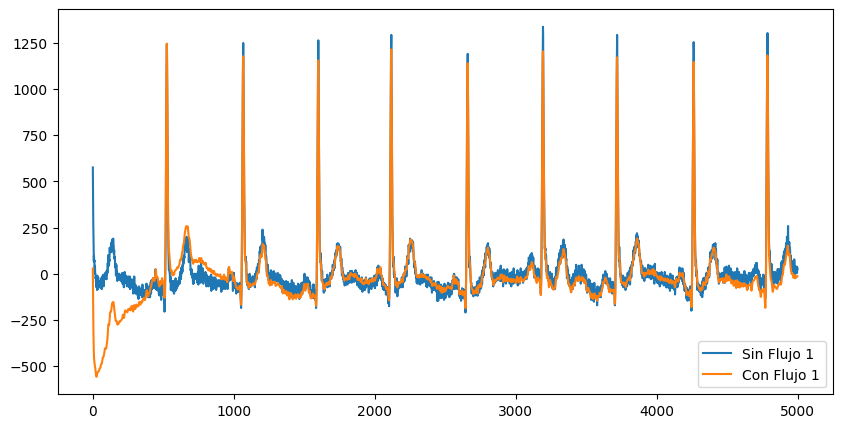

In [ ]:
senal_aleatoria_SB_F1 = []
for i in range(len(senal_aleatoria_SB)):
  senalF1=Flujo1(senal_aleatoria_SB[i].astype(float))
  senal_aleatoria_SB_F1.append(senalF1)

plt.figure(figsize=(10, 5))
plt.plot(tiempo,senal_aleatoria_SB[0],label="Sin Flujo 1") ; plt.plot(tiempo,senal_aleatoria_SB_F1[0],label="Con Flujo 1")
plt.legend() ;plt.xlabel("Tiempo (s)") ; plt.ylabel("Amplitud") ;plt.show()


# **Flujo 2**
1. Detrend
2. Filtro wavelet modificado del punto 3
3. Filtrado pasabajas 50 Hz. Justificar la elección de parámetros y si se usa FIR o IIR

In [ ]:
def Flujo2(senal):
  Fs=500
  orden_lp= 3.6/(50/Fs)
  orden_lp = math.floor(orden_lp) #Orden pasa bajas

  nyquist = Fs/2 # frecuencia de nyquist
  wn_lp = 50/nyquist #frecuencia de corte normalizada respecto nyquist para pasa bajas

  ## DETREND
  senal_filtrada_f2=signal.detrend(senal)

  ## APLICACION WAVELET MODIFICADO
  senal_filtrada_f2 = pywt.wavedec( senal_filtrada_f2, 'db3', level=7 )
  senal_filtrada_f2 = pywt.waverec(senal_filtrada_f2, 'db3') #Se reconstruye la señal con los coeficientes del wavelet

  ## PASA BAJAS
  lowpass_fir = signal.firwin(orden_lp+1,wn_lp, pass_zero = 'lowpass',window=('kaiser',6)) #filtro pasabajas
  senal_filtrada_f2 = signal.filtfilt(b=lowpass_fir,a=1,x=senal_filtrada_f2) # aplicación del filtro

  return senal_filtrada_f2


EJEMPLO FLUJO 2

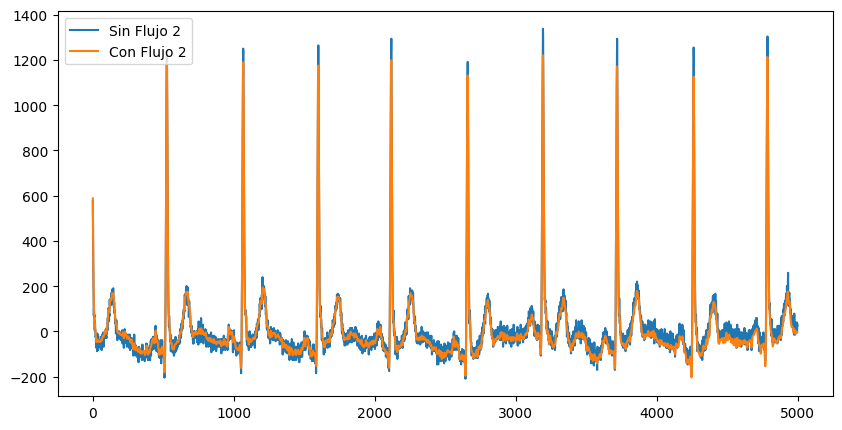

In [ ]:
senal_aleatoria_SB_F2 = []
for i in range(len(senal_aleatoria_SB)):
  senalF2=Flujo2(senal_aleatoria_SB[i].astype(float))
  senal_aleatoria_SB_F2.append(senalF2)

plt.figure(figsize=(10, 5))
plt.plot(tiempo,senal_aleatoria_SB[0],label="Sin Flujo 2") ; plt.plot(tiempo,senal_aleatoria_SB_F2[0],label="Con Flujo 2")
plt.legend() ; plt.xlabel("Tiempo (s)") ; plt.ylabel("Amplitud") plt.show()


# **Flujo 3**
1. Filtro pasa-altas usando filtro IIR a 0.5 Hz. Justificar la elección de parámetros y si se usa FIR o IIR
2. Filtrado pasabajas 50 Hz. Justificar la elección de parámetros y si se usa FIR o IIR

In [ ]:
def Flujo3(senal):
  Fs=500
  orden= 3.6/(50/Fs)
  orden = math.floor(orden) #Orden

  nyquist = Fs/2 # frecuencia de nyquist
  wn_hp = 0.5/nyquist #frecuencia de corte normalizada respecto nyquist para pasa bajas
  wn_lp = 50/nyquist #frecuencia de corte normalizada respecto nyquist para pasa bajas

  ## PASA ALTAS
  rp=0.1
  rs=30
  highpass_fir = signal.iirfilter(orden_hp,wn_hp, rp, rs,  btype = 'highpass', ftype='ellip') #filtro pasa altas
  senal_filtrada_f3 = signal.filtfilt(b=highpass_fir[0],a=highpass_fir[1],x=senal) # aplicación del filtro

  ## PASA BAJAS
  lowpass_fir = signal.firwin(orden+1,wn_lp, pass_zero = 'lowpass',window=('kaiser',6)) #filtro pasabajas
  senal_filtrada_f3 = signal.filtfilt(b=lowpass_fir,a=1,x=senal_filtrada_f3) # aplicación del filtro

  return senal_filtrada_f3


EJEMPLO FLUJO 3

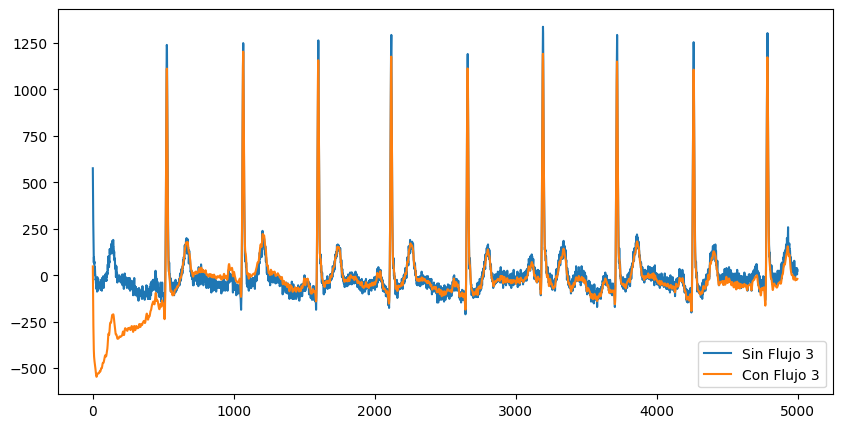

In [ ]:
senal_aleatoria_SB_F3 = []
for i in range(len(senal_aleatoria_SB)):
  senalF3=Flujo3(senal_aleatoria_SB[i].astype(float))
  senal_aleatoria_SB_F3.append(senalF3)

plt.figure(figsize=(10, 5))
plt.plot(tiempo,senal_aleatoria_SB[0],label="Sin Flujo 3") ; plt.plot(tiempo,senal_aleatoria_SB_F3[0],label="Con Flujo 3")
plt.legend() ;plt.xlabel("Tiempo (s)") ; plt.ylabel("Amplitud") plt.show()

**Describir los resultados obtenidos y decidir si el resto del procesamiento se hace con el flujo 1, el flujo 2 o el flujo 3 (20%)**

Los 3 flujos realizan un buen filtrado de la señal debido a que se evidencia la reducción del ruido y de pequeñas oscilaciones a lo largo de la onda. Ninguno de los flujos presenta un desfase de la señal filtrada respecto a la señal sin filtrar.

Para los 3 flujos se observa una reducción en la amplitud máxima de los picos que puede deberse al ruido de la señal en estos puntos.

A pesar de lo mencionado anteriormente, es claro que el flujo 1 y 3 presentan un tramo 'transitorio' en el cual distorsionan la señal alrededor del primer segundo de la señal, y es solo cuando sobrepasa los dos segundos que se acopla nuevamente a la forma de onda de la señal sin filtrar. Por ello es que se concluye que el flujo 2 presenta una mayor fidelidad después del filtrado. Adicional a esto, se considera que el flujo 2  es más completo en comparación a los otros dos pues aplica un detrend, un wavelet y un pasa bajas, garantizando eliminación de tendencias, frecuencias indeseadas y aplicando filtrado por descomposición de la señal. Para el filtrado de ciertas señales es recomendado implementar filtros lineales a la par de wavelet porque estos son útiles para señales transitorias o no estacionarias que pueden presentar eventos en ciertos tiempos que los filtros lineales van a suavizar o a desaparecer mientras que los wavelet los conservan por su característica de que no tiende a suavizar los cambios abruptos [10].


[10] Del Análisis de Fourier al Análisis Wavelet - CORE Reader. (s.f.). CORE – Aggregating the world’s open access research papers. https://core.ac.uk/reader/33703890

Con el flujo seleccionado procesar las señales de la base de datos ECGData.zip derivación II.

A las señales filtradas con el flujo seleccionado aplicar el procesamiento de normalización usado en el proyecto 2.

# Aplicación Flujo 2 de Trabajo , Normalización y Cálculo de Frecuencias con la Máxima Potencia:

In [ ]:

lista_flujo_afib = [] ; lista_flujo_sb = []   ;  lista_FrecMaxPot_AFIB = [] ; lista_FrecMaxPot_SB = []

for i in range(len(Der2_AFIB)):
  afib = Flujo2(Der2_AFIB[i].astype(float))
  afib = Detrend(afib)  ;  afib = comprimir(afib) ;  afib = Detrend(afib) ;  max_pot = Frec_MaxPot(afib)
  lista_FrecMaxPot_AFIB.append(max_pot)  ;   lista_flujo_afib.append(afib)

for i in range(len(Der2_SB)):
  sb = Flujo2(Der2_SB[i].astype(float))
  sb = Detrend(sb) ;  sb = comprimir(sb)  ;  sb = Detrend(sb) ;  max_pot = Frec_MaxPot(sb)
  lista_FrecMaxPot_SB.append(max_pot)    ;   lista_flujo_sb.append(sb)

EJEMPLO

Frecuencia máxima potencia sujeto ejemplo:  1.0


Text(0.5, 1.0, 'Detrend 2')

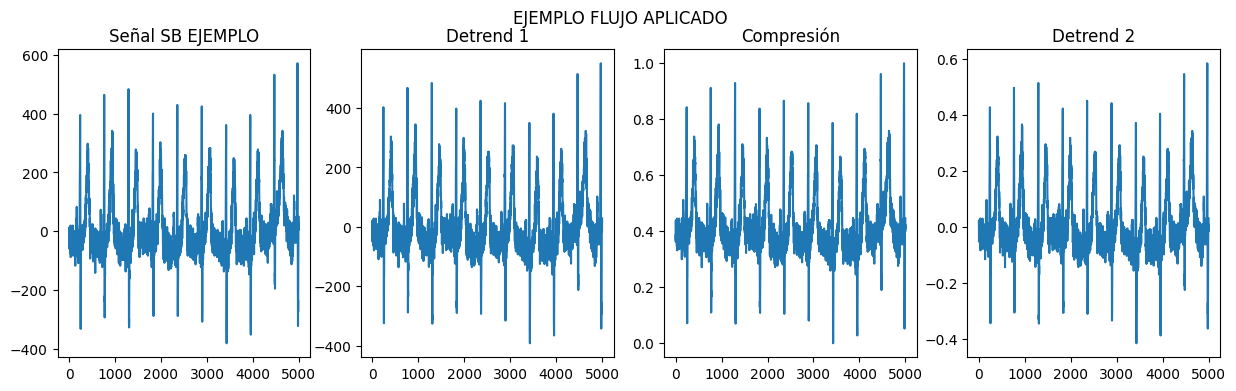

In [ ]:

# EJEMPLO
print("Frecuencia máxima potencia sujeto ejemplo: " ,Frec_MaxPot(Der2_SB[0].tolist()))
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))
plt.suptitle("EJEMPLO FLUJO APLICADO")
axes[0].plot(tiempo,Der2_SB[0])    ; axes[0].set_title('Señal SB EJEMPLO') ;axes[0].set_xlabel('Tiempo (s)');axes[0].set_ylabel('Amplitud')
axes[1].plot(tiempo,Detrend(Der2_SB[0]))    ; axes[1].set_title('Detrend 1');axes[1].set_xlabel('Tiempo (s)');axes[1].set_ylabel('Amplitud')
axes[2].plot(tiempo,comprimir(Detrend(Der2_SB[0])))    ; axes[2].set_title('Compresión');axes[2].set_xlabel('Tiempo (s)');axes[2].set_ylabel('Amplitud')
axes[3].plot(tiempo,Detrend(comprimir(Detrend(Der2_SB[0]))))    ; axes[3].set_title('Detrend 2');axes[3].set_xlabel('Tiempo (s)');axes[3].set_ylabel('Amplitud')

5. Para cada señal extraer la frecuencia que contiene la máxima potencia usando Welch (15%)

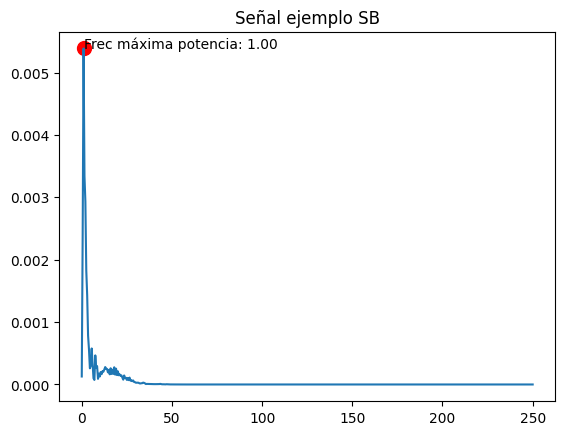

In [ ]:
Plot_Frec_MaxPot(lista_flujo_sb[0],"Señal ejemplo SB")

6. Crear una rutina que aplique sobre todos los archivos de la base de datos las rutina 3 al 5 y almacene los resultados en un dataframe donde se pueda registro, tipo de patología y el frecuencia de máxima potencia (fMP)

In [ ]:
Max_pot_AFIB = np.array(lista_FrecMaxPot_AFIB)  ;   Max_pot_SB = np.array(lista_FrecMaxPot_SB)
patologia = np.concatenate((Nombres_AFIB["Rhythm"] , Nombres_SB["Rhythm"]),axis=0)  ;   fmp = np.concatenate((Max_pot_AFIB,Max_pot_SB),axis=0) ; registro = np.concatenate((Nombres_AFIB["FileName"],Nombres_SB["FileName"]),axis=0)
print(len(patologia),len(fmp),len(registro))
data = {'Registro': registro, 'Patología': patologia, 'fMP': fmp}   ; df = pd.DataFrame(data)   ;   df

5669 5669 5669


,Registro,Patología,fMP
0,MUSE_20180113_171327_27000,AFIB,10.5
1,MUSE_20180114_075026_69000,AFIB,1.5
2,MUSE_20180113_133901_16000,AFIB,4.5
3,MUSE_20180116_123940_90000,AFIB,0.5
4,MUSE_20180114_075003_61000,AFIB,0.5
...,...,...,...
5664,MUSE_20180114_070348_17000,SB,0.5
5665,MUSE_20180114_134724_10000,SB,3.5
5666,MUSE_20180113_122544_20000,SB,3.0
5667,MUSE_20180114_074720_85000,SB,1.0


7. Comparar los resultados de fMP del proyecto 3 con los del proyecto 2 usando estadística descriptiva: gráficos y pruebas de hipótesis (15%). Discuta si hay más diferencias entre los tipos de señales con el flujo de procesamiento propuesto respecto al que se trabajó en el proyecto 2.

In [ ]:
#df_anterior = pd.read_excel("datos_df_corregidos.xlsx") ;   df_anterior

file_path = '/content/drive/MyDrive/Biosenales/datos_df_corregidos.xlsx'
df_anterior = pd.read_excel(file_path, sheet_name='Sheet1')


Se extrajeron los conjuntos de datos, de forma que se tienen 4 vectores, la fmp obtenidas de AFIB y SB con el flujo de trabajo utilizado y las obtenidas en el Proyecto 2 :

In [ ]:
Max_pot_AFIB    ,   Max_pot_SB      # VECTORES FLUJO DE TRABAJO ACTUAL
# Filtrar los datos donde Estado == 'AFIB'
df_afib_anterior = df_anterior[df_anterior['Estado'] == 'AFIB'] ;       Max_pot_AFIB_anterior = df_afib_anterior['fMP'] # FMP AFIB PROYECTO 2
# Filtrar los datos donde Estado == 'SB'
df_sb_anterior = df_anterior[df_anterior['Estado'] == 'SB']     ;       Max_pot_SB_anterior = df_sb_anterior['fMP']     # FMP SB PROYECTO 2


Se procedió a aplicar estadística descriptiva a los datos :

Se rechaza H0. Los datos AFIB ANTERIOR NO siguen una distribución normal.
Se rechaza H0. Los datos SB ANTERIOR NO siguen una distribución normal.
Se rechaza H0. Los datos AFIB ACTUAL NO siguen una distribución normal.
Se rechaza H0. Los datos SB ACTUAL NO siguen una distribución normal.


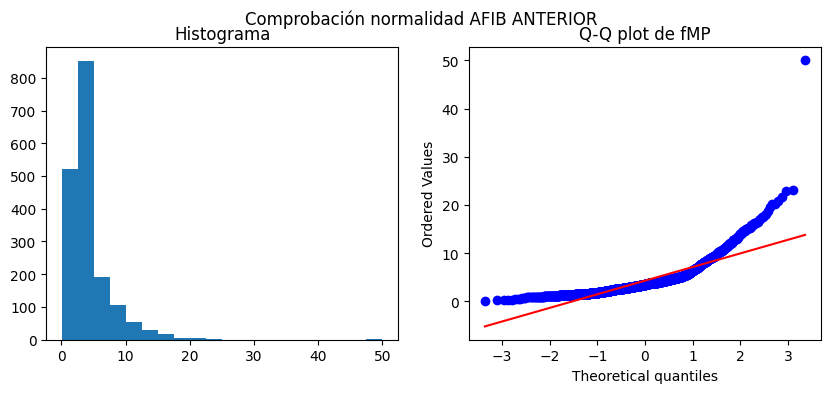

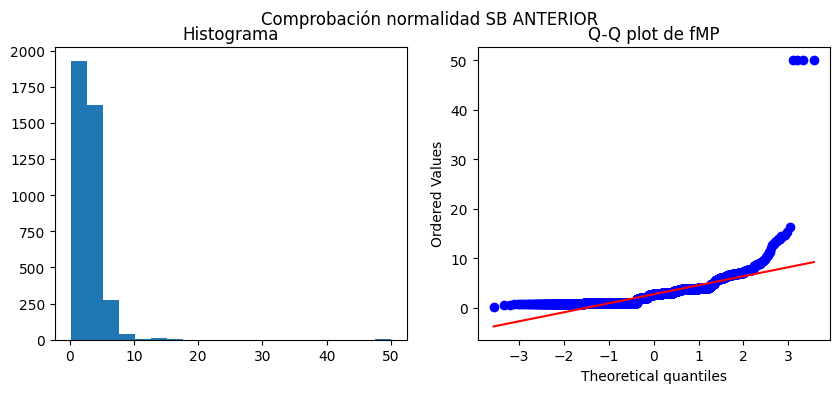

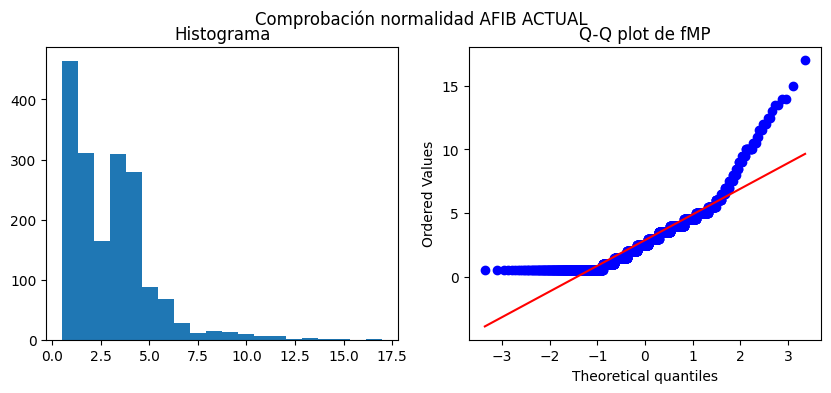

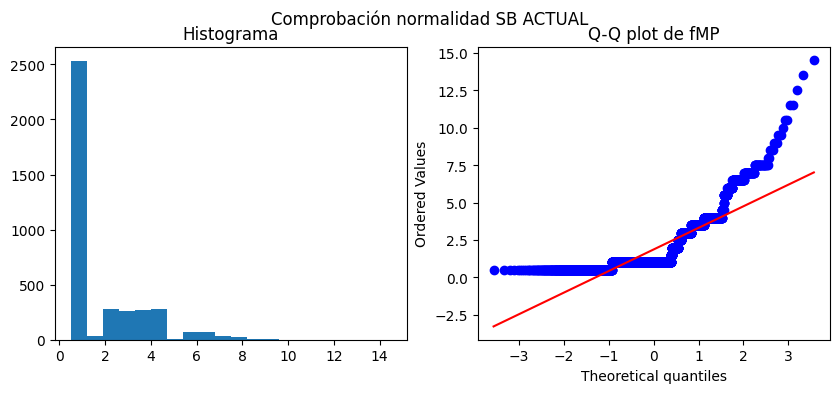

In [ ]:
print(evaluar_normalidad(Max_pot_AFIB_anterior,"AFIB ANTERIOR")) ; print(evaluar_normalidad(Max_pot_SB_anterior,"SB ANTERIOR"))
print(evaluar_normalidad(Max_pot_AFIB,"AFIB ACTUAL"))   ;   print(evaluar_normalidad(Max_pot_SB,"SB ACTUAL"))

graficas_normalidad(Max_pot_AFIB_anterior,"AFIB ANTERIOR")  ;   graficas_normalidad(Max_pot_SB_anterior,"SB ANTERIOR")
graficas_normalidad(Max_pot_AFIB,"AFIB ACTUAL") ;   graficas_normalidad(Max_pot_SB,"SB ACTUAL")

In [ ]:
print(len(Max_pot_AFIB_anterior),len(Max_pot_AFIB),len(Max_pot_SB_anterior),len(Max_pot_SB))

1780 1780 3888 3889


Se rechaza H0. Los datos AFIB ANTERIOR y AFIB ACTUAL NO son homocedasticos, tienen varianzas distintas.
Se rechaza H0. Los datos SB ANTERIOR y SB ACTUAL NO son homocedasticos, tienen varianzas distintas.


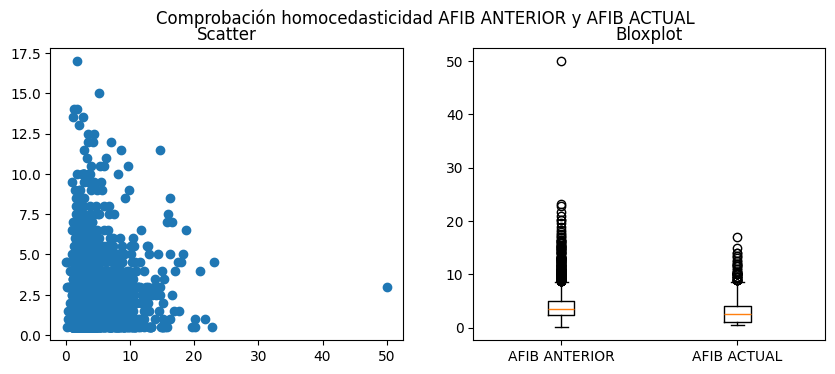

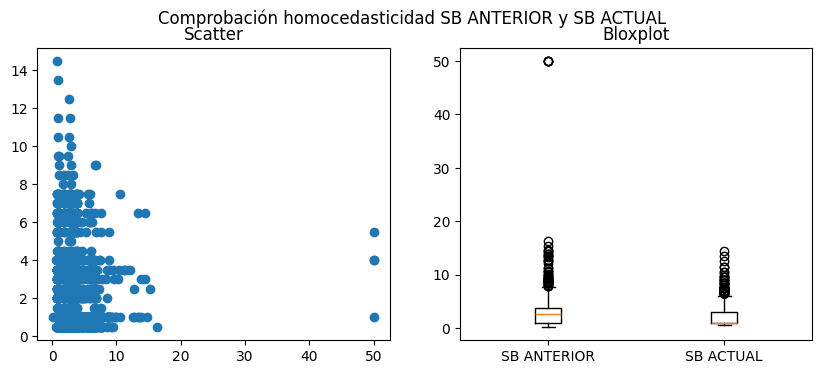

In [ ]:
print(evaluar_homocedasticidad(Max_pot_AFIB_anterior,Max_pot_AFIB,"AFIB ANTERIOR","AFIB ACTUAL"))
print(evaluar_homocedasticidad(Max_pot_SB_anterior,Max_pot_SB,"SB ANTERIOR","SB ACTUAL"))

graficas_homocedasticidad(Max_pot_AFIB_anterior,Max_pot_AFIB,"AFIB ANTERIOR","AFIB ACTUAL")
graficas_homocedasticidad(Max_pot_SB_anterior,Max_pot_SB[0:3888],"SB ANTERIOR","SB ACTUAL")

Al ser los datos originales los mismos, el supuesto de independencia tampoco se cumple. Por ende, se aplican pruebas NO PARAMÉTRICAS para evaluar las diferencias entre los conjuntos de datos.

In [ ]:

print("Rango Intercuartil AFIB ANTERIOR :" , Rango_Intercuartil(Max_pot_AFIB_anterior))
print("Rango Intercuartil SB ANTERIOR :" , Rango_Intercuartil(Max_pot_SB_anterior))
print("Rango Intercuartil AFIB ACTUAL :" , Rango_Intercuartil(Max_pot_AFIB))
print("Rango Intercuartil SB ACTUAL :" , Rango_Intercuartil(Max_pot_SB))

Rango Intercualtil AFIB ANTERIOR : 2.5000000000000004
Rango Intercualtil SB ANTERIOR : 2.7
Rango Intercualtil AFIB ACTUAL : 3.0
Rango Intercualtil SB ACTUAL : 2.0


In [ ]:
print(Mann_Whitney_U(Max_pot_AFIB,Max_pot_AFIB_anterior,"AFIB ACTUAL","AFIB ANTERIOR") )
print(Mann_Whitney_U(Max_pot_SB,Max_pot_SB_anterior,"SB ACTUAL","SB ANTERIOR") )

Se rechaza H0. Hay una diferencia significativa entre las muestras AFIB ACTUAL y AFIB ANTERIOR en términos de medianas.
Se rechaza H0. Hay una diferencia significativa entre las muestras SB ACTUAL y SB ANTERIOR en términos de medianas.


In [ ]:
print(Prueba_KS(Max_pot_AFIB,Max_pot_AFIB_anterior,"AFIB ACTUAL","AFIB ANTERIOR") )
print(Prueba_KS(Max_pot_SB,Max_pot_SB_anterior,"SB ACTUAL","SB ANTERIOR") )

No se rechaza la hipótesis nula H0, las muestras AFIB ACTUAL y AFIB ANTERIOR provienen de distribuciones diferentes.
No se rechaza la hipótesis nula H0, las muestras SB ACTUAL y SB ANTERIOR provienen de distribuciones diferentes.


## Descripción

Los procesos de detrend, compresión y cálculo de frecuencias con máxima potencia fueron realizados exactamente de la misma forma (con las mismas funciones) que en el proyecto anterior, por lo cual, los cambios en los datos obtenidos corresponden únicamente a la aplicación del flujo de filtrado.

Al ser evaluados los datos de AFIB y SB anteriores y actuales, se observa que los datos intermedios se adecuan a una distribución normal pero los datos situados en los extremos se salen de esta distrubución, al hacer la prueba de normalidad se confirmó que los datos AFIB y SB tanto actuales como los trabajados en el proyecto 2 no distribuyen de manera normal. Por esto, sumado al hecho de que, al realizar la prueba de homocedasticidad se concluyó que los datos tienen varianzas distintas, se emplearon pruebas no paramétricas.

Al realizar la prueba de U Mann Whitney se encuentra que hay diferencias significativas entre las muestras procesadas en este proyecto respecto a las trabajadas en el proyecto 2 pues presentan diferencias significativas en términos de medianas, esto puede ser un indicador de que el proceso de filtrado llevado a cabo ocasionó ciertas distorsiones en las señales haciendo que sean significativamente diferentes a las señales filtradas trabajadas en el proyecto 2. También puede deberse a que los procesos de filtrado empleados en este proyecto y los que se emplearon para filtrar las señales en la base de datos otorgadas no son los mismos.

El RI (Rango Intercuartil) de AFIB ha aumentado de 2.5 a 3.0. Esto sugiere que la variabilidad o dispersión de los datos relacionados con la Fibrilación Auricular es mayor, pues más dispersos alrededor de un valor central en el proyecto actual que en el anterior.
El RI de SB ha disminuido de 2.7 a 2.0. Esto indica que los valores de SB están ahora más concentrados alrededor de su valor central.
Esto hace que en este caso, los datos de SB asean más predecibles y representativos que AFIB por obtener resultados más concentrados.

Al hacer la prueba KS, se obtuvieron resultados contundente en cuanto a la diferencia en distribución de las muestras, sugiriendo que los datos provienen de distintas fuentes, esto nuevamente puede ser debido a los procesos de filtrado empleados y a los argumentos discutidos con anterioridad.

**CONCLUSIONES**

* A pesar de que, tanto los datos trabajados en el proyecto 2 como los trabajados en este proyecto luego del proceso de filtrado y de normalización provienen de la misma fuente (mismas señales crudas de ECG para AFIB y SB), los resultados estadísticos indican lo contrario. Esto puede dar a entender que los procesos de filtrado fueron muy diferentes en cuanto a los parámetros empleados (orden, tipo de ventana, entre otros que fueron sustentados con la literatura) o en cuanto a los filtros realizados, o que estos ocasionaron distorsiones significativas en las señales y que por tal motivo al realizar las pruebas no paramétricas se obtienen diferencias estadísticas significativas.

* Si bien los resultados de este proyecto vs el anterior difieren, la dinámica de las señales se mantuvo, y se logró eliminar información indeseada de las mismas, con lo cual el objetivo de filtrar los datos se cumple, más aún cuando se tiene en cuenta que no existe filtro perfecto.